## Numerical columns are taken as features here.

As the data was imbalanced-
1) RandomOverSampler is used to balance the data. 

-> confusion matrix is also printed.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase and remove non-alphanumeric characters
    tokens = [token.lower() for token in tokens if token.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

def predict_cyberbullying(X, y):
    # Train the classification model (you can use any model here)
    model = LogisticRegression()
    model.fit(X, y)

    # Predict the labels for all data
    y_pred = model.predict(X)

    return y_pred

def evaluate_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'SVM': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier()
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, y_prob)
        else:
            auc_score = None
        results.append((name, accuracy, auc_score))
        print(f"Confusion Matrix for {name}:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
    return results

def nlp_pipeline(file_path, target_column='oh_label', text_column='Text'):
    # Read the dataset
    df = pd.read_csv(file_path)
    df = df.drop(['UserIndex', 'index'], axis=1)
    df.rename(columns={target_column: 'Label'}, inplace=True)
    
    # Text Preprocessing
    df['processed_text'] = df[text_column].apply(preprocess_text)
    
    # Feature Selection
    numerical_columns = df.select_dtypes(include='number').columns.tolist()
    if 'Label' in numerical_columns:
        numerical_columns.remove('Label')
    print("\nNumerical columns:", numerical_columns)
    
    # Modeling
    X = df[numerical_columns]
    y = df['Label']
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Evaluate models
    results = evaluate_model(X_train, X_test, y_train, y_test)
    
    # Print results
    for name, accuracy, auc_score in results:
        print(f"{name}: Accuracy = {accuracy}, AUC = {auc_score}")

# Example usage:
nlp_pipeline('cyberbullying/youtube_parsed_dataset.csv')



Numerical columns: ['Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Profanity in UserID', 'Age']
Confusion Matrix for Logistic Regression:
[[390 235]
 [267 327]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       625
           1       0.58      0.55      0.57       594

    accuracy                           0.59      1219
   macro avg       0.59      0.59      0.59      1219
weighted avg       0.59      0.59      0.59      1219

Confusion Matrix for Random Forest:
[[562  63]
 [  0 594]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       625
           1       0.90      1.00      0.95       594

    accuracy                           0.95      1219
   macro avg       0.95      0.95      0.95      1219
weighted avg       0.95      0.95      0.95      1219

Confusion Matrix for XGBoost:
[[52

These graphs helps us to see model performence with increaqse in training size.


Numerical columns: ['Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Profanity in UserID', 'Age']
Confusion Matrix for Logistic Regression:
[[390 235]
 [267 327]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       625
           1       0.58      0.55      0.57       594

    accuracy                           0.59      1219
   macro avg       0.59      0.59      0.59      1219
weighted avg       0.59      0.59      0.59      1219



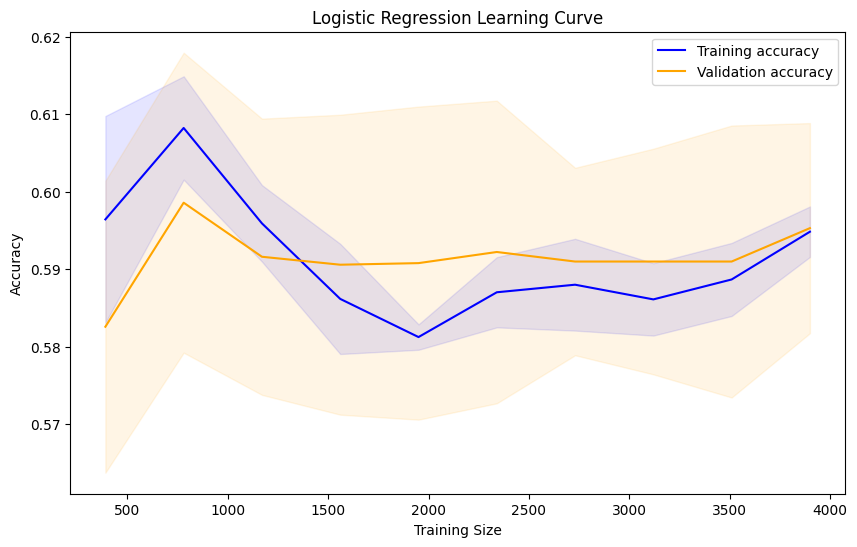

Confusion Matrix for Random Forest:
[[563  62]
 [  0 594]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       625
           1       0.91      1.00      0.95       594

    accuracy                           0.95      1219
   macro avg       0.95      0.95      0.95      1219
weighted avg       0.95      0.95      0.95      1219



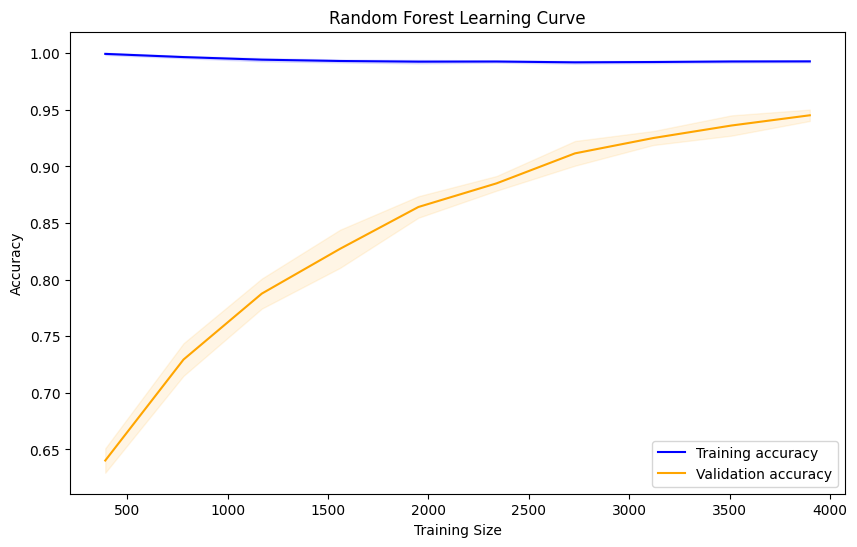

Confusion Matrix for XGBoost:
[[520 105]
 [ 21 573]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       625
           1       0.85      0.96      0.90       594

    accuracy                           0.90      1219
   macro avg       0.90      0.90      0.90      1219
weighted avg       0.90      0.90      0.90      1219



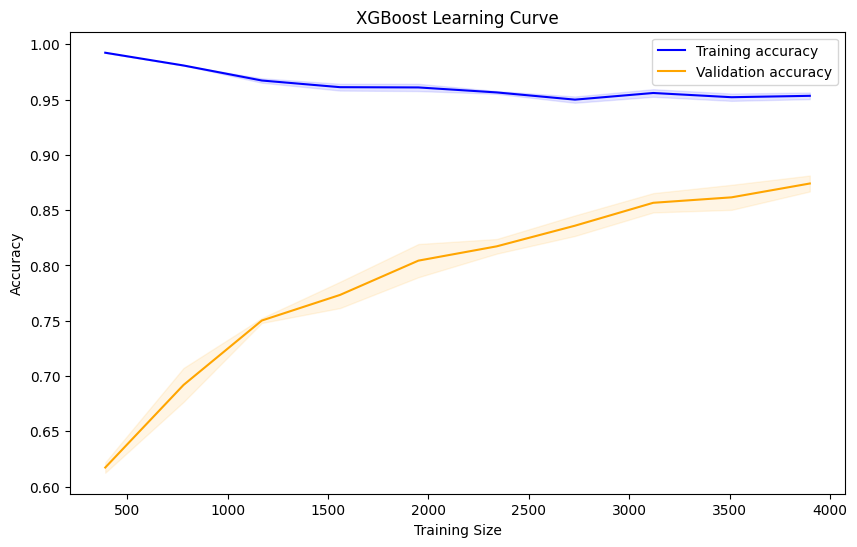

Confusion Matrix for SVM:
[[355 270]
 [234 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       625
           1       0.57      0.61      0.59       594

    accuracy                           0.59      1219
   macro avg       0.59      0.59      0.59      1219
weighted avg       0.59      0.59      0.59      1219



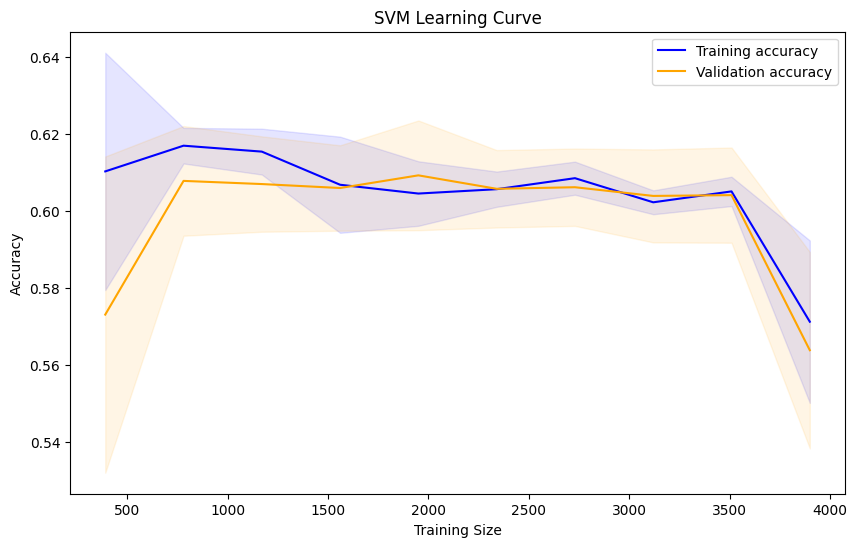

Confusion Matrix for Decision Tree:
[[528  97]
 [  0 594]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       625
           1       0.86      1.00      0.92       594

    accuracy                           0.92      1219
   macro avg       0.93      0.92      0.92      1219
weighted avg       0.93      0.92      0.92      1219



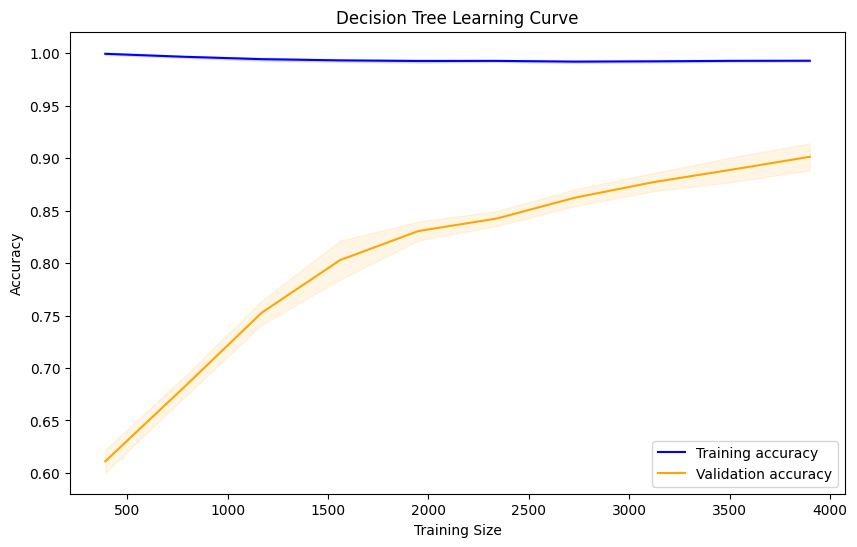

Logistic Regression: Accuracy = 0.5881870385561936, AUC = 0.6185616161616162
Random Forest: Accuracy = 0.9491386382280558, AUC = 0.997369696969697
XGBoost: Accuracy = 0.896636587366694, AUC = 0.956142760942761
SVM: Accuracy = 0.5865463494667761, AUC = 0.6251784511784512
Decision Tree: Accuracy = 0.9204265791632485, AUC = 0.9254410774410774


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import learning_curve

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase and remove non-alphanumeric characters
    tokens = [token.lower() for token in tokens if token.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

def predict_cyberbullying(X, y):
    # Train the classification model (you can use any model here)
    model = LogisticRegression()
    model.fit(X, y)

    # Predict the labels for all data
    y_pred = model.predict(X)

    return y_pred

def evaluate_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'SVM': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier()
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, y_prob)
        else:
            auc_score = None
        results.append((name, accuracy, auc_score))
        print(f"Confusion Matrix for {name}:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot learning curves
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        plt.plot(train_sizes, test_mean, label='Validation accuracy', color='orange')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
        plt.title(f'{name} Learning Curve')
        plt.xlabel('Training Size')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
    return results

def nlp_pipeline(file_path, target_column='oh_label', text_column='Text'):
    # Read the dataset
    df = pd.read_csv(file_path)
    df = df.drop(['UserIndex', 'index'], axis=1)
    df.rename(columns={target_column: 'Label'}, inplace=True)
    
    # Text Preprocessing
    df['processed_text'] = df[text_column].apply(preprocess_text)
    
    # Feature Selection
    numerical_columns = df.select_dtypes(include='number').columns.tolist()
    if 'Label' in numerical_columns:
        numerical_columns.remove('Label')
    print("\nNumerical columns:", numerical_columns)
    
    # Modeling
    X = df[numerical_columns]
    y = df['Label']
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Evaluate models
    results = evaluate_model(X_train, X_test, y_train, y_test)
    
    # Print results
    for name, accuracy, auc_score in results:
        print(f"{name}: Accuracy = {accuracy}, AUC = {auc_score}")

# Example usage:
nlp_pipeline('cyberbullying/youtube_parsed_dataset.csv')



The learning curve are providing insights about overfitting of the model. Random Forest, XGBoost, Decision Tree MOdels seems overfit if the training size is small. But on increasing the training size , the model seems good with good validation accuracy too.

